# Keras Convolutional Neural Networks with MNIST

## Import Libraries

In [1]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Load the Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Inspect the Data

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
single_image = X_train[0]

single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

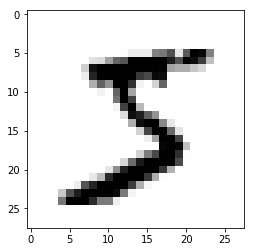

In [5]:
plt.imshow(single_image, cmap='gray_r')

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_train.shape

(60000,)

## Preproces the Data

### One-hot Encoding

In [8]:
y_categorical_train = to_categorical(y_train, 10)
y_categorical_test = to_categorical(y_test, 10)

In [9]:
y_categorical_train[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
single_image.max()

255

### Scale the Data

In [11]:
X_train = X_train / X_train.max()

In [12]:
X_test = X_test / X_test.max()

In [13]:
scaled_image = X_train[0]

scaled_image.max(), scaled_image.min(), scaled_image.mean()

(1.0, 0.0, 0.13768007202881152)

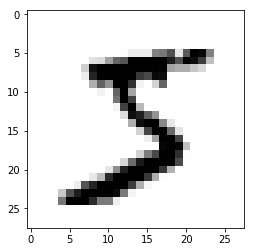

In [14]:
plt.imshow(scaled_image, cmap='gray_r')

### Reshape the Data

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [17]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [18]:
X_train.shape

(60000, 28, 28, 1)

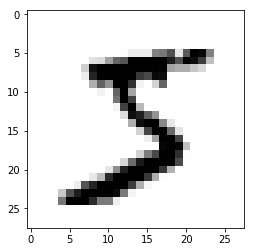

In [19]:
plt.imshow(scaled_image, cmap='gray_r')

## Building the Model

In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Train and Evaluate the Model

In [21]:
model.fit(X_train, y_categorical_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 248s 4ms/step - loss: 0.1510 - acc: 0.9544
Epoch 2/2
60000/60000 [==============================] - 213s 4ms/step - loss: 0.0525 - acc: 0.9843


In [22]:
model.metrics_names

['loss', 'acc']

In [23]:
model.evaluate(X_test, y_categorical_test)

10000/10000 [==============================] - 19s 2ms/step


[0.05391053042607382, 0.9828]

In [24]:
predictions = model.predict_classes(X_test)

In [25]:
y_categorical_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [27]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [28]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       1.00      0.99      1.00      1135
          2       0.98      0.98      0.98      1032
          3       0.97      1.00      0.98      1010
          4       0.99      0.98      0.98       982
          5       0.99      0.98      0.98       892
          6       0.99      0.97      0.98       958
          7       1.00      0.96      0.98      1028
          8       0.99      0.97      0.98       974
          9       0.94      0.99      0.97      1009

avg / total       0.98      0.98      0.98     10000

